In [49]:
import numpy as np
import pandas as pd
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
#%matplotlib notebook

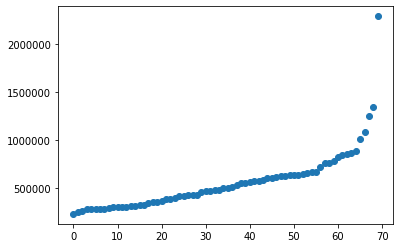

In [68]:

df_train=pd.read_csv("../Data/House Price Prediction/train.csv")
df_train['date']=pd.to_datetime(df_train['date'])
df_train['year']=df_train['date'].dt.year
df_train['month']=df_train['date'].dt.month

table_zip=pd.pivot_table(df_train,values='price',index='zipcode',aggfunc=np.mean)
table_zip=table_zip.sort_values('price')
table_zip['sorted_zipcode']=range(len(table_zip))
table_zip.sort_index(inplace=True)
plt.scatter(table_zip['sorted_zipcode'],table_zip['price'])
plt.show()

In [69]:

for i in range(len(df_train)):
    zc=df_train.loc[i,'zipcode']
    zp_new=table_zip.loc[zc,'sorted_zipcode']
    df_train.loc[i,'zipcode']=zp_new




In [80]:
y=df_train['price']
X_train=df_train.drop(['price','id','date'],axis=1)

X_train.head()

reg=lm.LinearRegression()
y_log=np.log(y)
reg.fit(X_train,y_log)

pred=reg.predict(X_train)
pred=np.exp(pred)
pred[pred>df_train['price'].max()]=df_train['price'].max()
pred[pred<df_train['price'].min()]=df_train['price'].min()

print('MSE is:',round(np.sqrt(mse(y,pred)),2))
print('R2 is:',round(r2_score(y,pred),2))



MSE is: 146257.25
R2 is: 0.85


In [54]:
scores=cross_val_score(reg,X=X_train,y=y_log,cv=5,scoring='r2')
print(scores)
print('cv_mean:',round(scores.mean(),2))
print('cv_std:',round(scores.std(),2))


[0.85249431 0.85325097 0.84004226 0.86688804 0.83638025]
cv_mean: 0.85
cv_std: 0.01


In [87]:

poly=PolynomialFeatures(2)
X_train2=poly.fit_transform(X_train)
polynames=poly.get_feature_names(X_train.columns)
X_train2=pd.DataFrame(X_train2,columns=polynames)
X_train2.head()




,1,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_living15^2,sqft_living15 sqft_lot15,sqft_living15 year,sqft_living15 month,sqft_lot15^2,sqft_lot15 year,sqft_lot15 month,year^2,year month,month^2
0,1.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,...,1795600.0,7571000.0,2698760.0,13400.0,31922500.0,11379100.0,56500.0,4056196.0,20140.0,100.0
1,1.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,...,2856100.0,12909910.0,3403660.0,20280.0,58354321.0,15384946.0,91668.0,4056196.0,24168.0,144.0
2,1.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,...,7398400.0,21928640.0,5480800.0,5440.0,64995844.0,16244930.0,16124.0,4060225.0,4030.0,4.0
3,1.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,...,1849600.0,6800000.0,2739040.0,16320.0,25000000.0,10070000.0,60000.0,4056196.0,24168.0,144.0
4,1.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,...,3240000.0,13505400.0,3627000.0,3600.0,56295009.0,15118545.0,15006.0,4060225.0,4030.0,4.0


In [88]:
scaleit=StandardScaler()

#scaleit.fit(X_train2)
#X_train3=scaleit.tranform(X_train2)
X_train3=scaleit.fit_transform(X_train2)

X_train3=pd.DataFrame(X_train3,columns=X_train2.columns)
X_train3.head()


,1,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_living15^2,sqft_living15 sqft_lot15,sqft_living15 year,sqft_living15 month,sqft_lot15^2,sqft_lot15 year,sqft_lot15 month,year^2,year month,month^2
0,0.0,-0.394762,-1.384732,-0.958192,-0.230663,-0.844194,-0.089235,-0.311479,-0.669848,-0.509865,...,-0.795574,-0.305593,-0.946133,0.061478,-0.090722,-0.282350,-0.157060,-0.697846,1.109671,1.113274
1,0.0,-0.394762,0.245400,0.567363,-0.195316,1.109507,-0.089235,-0.311479,-0.669848,-0.509865,...,-0.465987,-0.233727,-0.425530,0.938248,-0.088036,-0.209546,0.020734,-0.697846,1.750710,2.143967
2,0.0,-1.486472,-1.384732,-1.408176,-0.134080,-0.844194,-0.089235,-0.311479,-0.669848,-1.367645,...,0.945687,-0.112328,1.108538,-0.952926,-0.087361,-0.193916,-0.361183,1.432981,-1.454164,-1.135509
3,0.0,0.696948,1.223479,-0.102125,-0.245095,-0.844194,-0.089235,-0.311479,2.331936,-0.509865,...,-0.778792,-0.315971,-0.916384,0.433595,-0.091426,-0.306142,-0.139365,-0.697846,1.750710,2.143967
4,0.0,-0.394762,-0.080626,-0.409432,-0.176710,-0.844194,-0.089235,-0.311479,-0.669848,0.347916,...,-0.346677,-0.225711,-0.260583,-1.187411,-0.088245,-0.214388,-0.366835,1.432981,-1.454164,-1.135509


In [89]:

#df_train.drop(['price','id','date'],axis=1,inplace=True)

reg=lm.LinearRegression()
y_log=np.log(y)
reg.fit(X_train3,y_log)

pred=reg.predict(X_train3)
pred=np.exp(pred)
pred[pred>df_train['price'].max()]=df_train['price'].max()
pred[pred<df_train['price'].min()]=df_train['price'].min()



In [90]:
print('MSE is:',round(np.sqrt(mse(y,pred)),2))
print('R2 is:',round(r2_score(y,pred),2))



MSE is: 127795.79
R2 is: 0.89


In [91]:
scores=cross_val_score(reg,X=X_train3,y=y_log,cv=5,scoring='r2')
print(scores)

print('cv_mean:',round(scores.mean(),2))
print('cv_std:',round(scores.std(),2))

[0.86554094 0.86928229 0.86004499 0.88297496 0.85420666]
cv_mean: 0.87
cv_std: 0.01


(0, 8000000)

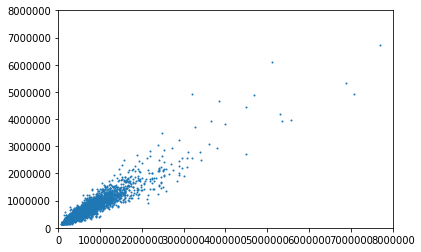

In [92]:

plt.scatter(y,pred,s=1)
plt.xlim(0,8000000)
plt.ylim(0,8000000)


In [93]:

df_test=pd.read_csv("../Data/House Price Prediction/test.csv")
df_test['date']=pd.to_datetime(df_test['date'])
df_test['year']=df_test['date'].dt.year
df_test['month']=df_test['date'].dt.month

for i in range(len(df_test)):
    zc=df_test.loc[i,'zipcode']
    zp_new=table_zip.loc[zc,'sorted_zipcode']
    df_test.loc[i,'zipcode']=zp_new

X_test=df_test.drop(['id','date'],axis=1)

In [94]:

X_test2=poly.transform(X_test)
polynames=poly.get_feature_names(X_test.columns)
X_test2=pd.DataFrame(X_test2,columns=polynames)
X_train2.head()


X_test3=scaleit.transform(X_test2)
X_test3=pd.DataFrame(X_test3,columns=X_test2.columns)
X_test3.head()





,1,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_living15^2,sqft_living15 sqft_lot15,sqft_living15 year,sqft_living15 month,sqft_lot15^2,sqft_lot15 year,sqft_lot15 month,year^2,year month,month^2
0,0.0,0.696948,0.571426,-0.157001,-0.127419,-0.844194,-0.089235,-0.311479,-0.669848,0.347916,...,-0.219846,-0.208251,-0.098294,0.057654,-0.087862,-0.205483,-0.168435,-0.697846,0.148114,-0.081392
1,0.0,1.788658,1.549505,1.214901,-0.121047,-0.844194,-0.089235,-0.311479,2.331936,-0.509865,...,0.150577,-0.177672,0.334687,-0.805098,-0.087845,-0.204939,-0.324990,1.432981,-1.133485,-1.018385
2,0.0,-0.394762,-0.732679,-0.036274,-0.103929,-0.844194,-0.089235,-0.311479,0.831044,-1.367645,...,0.392025,-0.103797,0.585927,-0.136051,-0.084756,-0.140695,-0.202054,-0.697846,-0.492924,-0.643588
3,0.0,0.696948,2.201558,1.269777,-0.199490,1.109507,-0.089235,-0.311479,0.831044,0.347916,...,0.362687,-0.153809,0.556178,0.749641,-0.087430,-0.195600,-0.118334,-0.697846,0.468633,0.269981
4,0.0,-0.394762,0.245400,0.325908,0.785120,-0.844194,-0.089235,-0.311479,-0.669848,-0.509865,...,0.362687,1.218422,0.556178,0.749641,0.174527,1.392255,1.636148,-0.697846,0.468633,0.269981


In [95]:

pred=reg.predict(X_test3)
pred=np.exp(pred)
A_pred=np.array([df_test['id'],pred]).T
df_pred=pd.DataFrame(A_pred,columns=['id','predict'])
df_pred.to_csv('test_predict.csv',index=False)


# RMSE: 137874.0
# R2 :0.852